In [162]:
print('Hello')

Hello


In [163]:
import numpy as np
import pandas as pd
import kaggle
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

In [164]:
import warnings
warnings.filterwarnings('ignore')

In [165]:
kaggle.api.authenticate()
kaggle.api.dataset_download_files('mirichoi0218/insurance',unzip=True,path='./dataset')

Dataset URL: https://www.kaggle.com/datasets/mirichoi0218/insurance


In [166]:
df = pd.read_csv('./dataset/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [167]:
df.shape

(1338, 7)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [169]:
df.isna().sum().sum()

np.int64(0)

In [170]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [171]:
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [172]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [173]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [174]:
df.columns = df.columns.str.strip()

# Univariate analysis

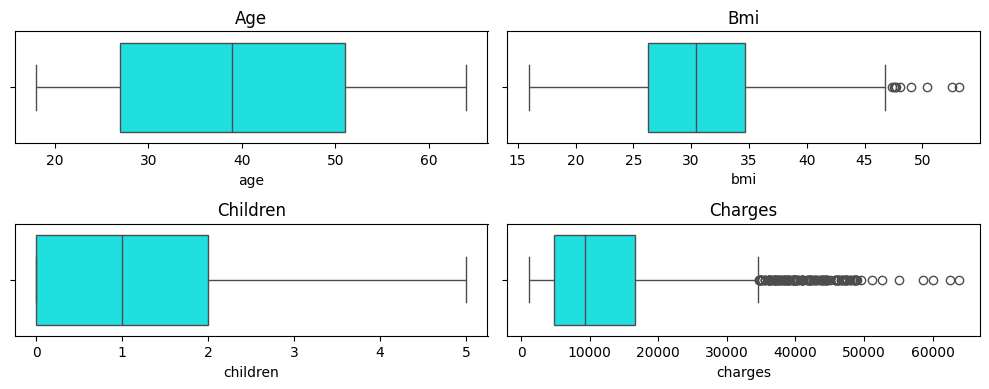

In [175]:
total=len(df.select_dtypes(include='number').columns)
fig,axes = plt.subplots(2,2,figsize=(10,4))
axes = axes.flatten()
for i,col in enumerate(df.select_dtypes(include='number').columns):
    sns.boxplot(x=df[col],ax=axes[i],orient='h',color='cyan')
    axes[i].set_title(col.title())
plt.tight_layout()
plt.show()


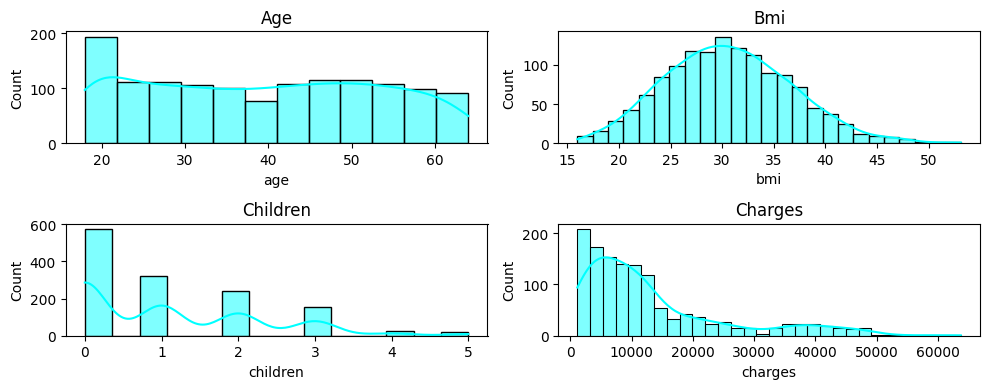

In [176]:
total=len(df.select_dtypes(include='number').columns)
fig,axes = plt.subplots(2,2,figsize=(10,4))
axes = axes.flatten()
for i,col in enumerate(df.select_dtypes(include='number').columns):
    sns.histplot(x=df[col],ax=axes[i],color='cyan',kde=True)
    axes[i].set_title(col.title())
plt.tight_layout()
plt.show()


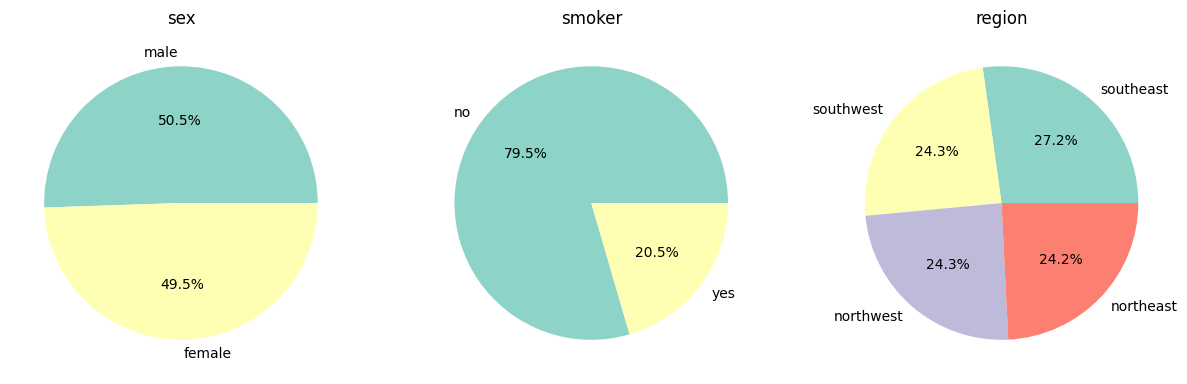

In [177]:
fig,axes = plt.subplots(1,3,figsize=(15,5))
axes = axes.flatten()
for i, col in enumerate(df.select_dtypes(exclude='number').columns):
    counts = df[col].value_counts()
    axes[i].pie(counts.values, labels=counts.index, autopct='%1.1f%%',colors=plt.cm.Set3.colors[:len(counts)])
    axes[i].set_title(f'{col}')

In [178]:
df['sex'].replace(['male','female'],[1,0],inplace=True)
df['smoker'].replace(['yes','no'],[1,0],inplace=True)

In [179]:
skew = df.select_dtypes(include='number').skew()
skew.sort_values(ascending=False)

charges     1.515880
smoker      1.464766
children    0.938380
bmi         0.284047
age         0.055673
sex        -0.020951
dtype: float64

### No Skewness as charges is our target variable and smoker is the object variable

# Bivariate Analysis

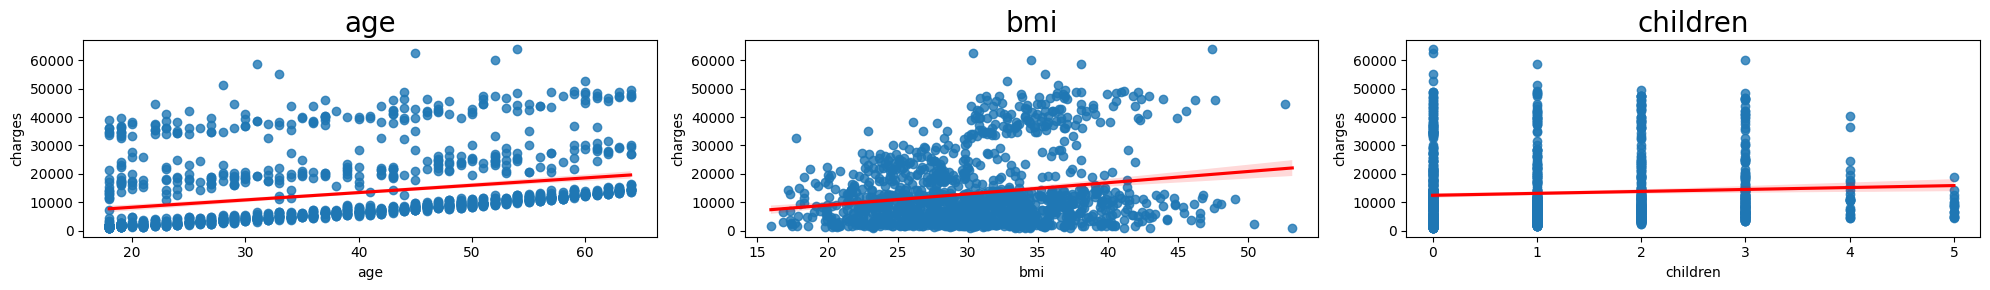

In [180]:
features = df.drop(columns=['charges'])
target = df['charges']

fig,axes = plt.subplots(nrows=1, ncols=3,figsize=(20,3))
axes= axes.flatten()

for i,col in enumerate(['age', 'bmi', 'children']):
    sns.regplot(data=df,x=col,y='charges',ax=axes[i], line_kws={'color': 'red'} )
    axes[i].set_title(col, fontsize=20)

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [181]:
# Correlation
corr = df.select_dtypes(include=['number']).corr()
corr

,age,sex,bmi,children,smoker,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000


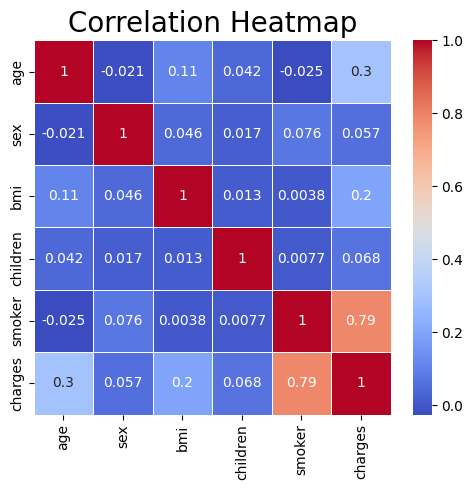

In [182]:
plt.figure(figsize=(5, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=20)
plt.tight_layout()
plt.show()

In [183]:
for i in ['age', 'bmi', 'children', ]:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[i] < lower_bound) | (df[i] > upper_bound)]

    print("Number of outliers in column :",i,' is ', outliers.shape[0])

Number of outliers in column : age  is  0
Number of outliers in column : bmi  is  9
Number of outliers in column : children  is  0


#### Label Encoding Region column

In [184]:
le = LabelEncoder()
df['region'] = le.fit_transform(df['region'])

# Model Building

In [185]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.9240
1,18,1,33.77,1,0,2,1725.5523
2,28,1,33.00,3,0,2,4449.4620


In [186]:
x = df.drop(columns=['charges'])
y = df['charges']

In [188]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=7)


In [193]:
x_train.shape,x_test.shape,y_train.shape, y_test.shape

((1003, 6), (335, 6), (1003,), (335,))

In [194]:
from sklearn.discriminant_analysis import StandardScaler


scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [196]:
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error


models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(max_iter=10000),
    'ElasticNet Regression': ElasticNet(max_iter=10000)
}

results = []

for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    
    # Predictions
    y_pred_train = model.predict(x_train_scaled)
    y_pred_test = model.predict(x_test_scaled)
    
    # metrics
    train_mae = mean_absolute_error(y_train, y_pred_train)
    train_r2 = r2_score(y_train, y_pred_train)
    
    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_r2 = r2_score(y_test, y_pred_test)
    
    results.append({
        'Model': name,
        'Train MAE': train_mae,
        'Train R2': train_r2,
        'Test MAE': test_mae,
        'Test R2': test_r2
    })

results_df = pd.DataFrame(results)

results_df = results_df.sort_values(by='Test R2', ascending=False)

print(results_df)

                   Model    Train MAE  Train R2     Test MAE   Test R2
1       Ridge Regression  4185.644416  0.750383  4268.373430  0.751773
2       Lasso Regression  4184.413351  0.750383  4266.962723  0.751771
0      Linear Regression  4184.519629  0.750383  4267.141412  0.751766
3  ElasticNet Regression  5076.502252  0.666094  5243.635330  0.669000


In [197]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=8),
    param_grid=param_grid,
    cv=5,
    scoring='r2',         
    verbose=2,
    n_jobs=-1             
)
grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score (CV R2):", grid_search.best_score_)
best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best Score (CV R2): 0.8566326453022832


In [198]:
y_pred_train = best_rf.predict(x_train)

# Calculating training MAE and R2
train_mae = mean_absolute_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)

y_pred_test = best_rf.predict(x_test)

test_mae = mean_absolute_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print("Best RF Train MAE:", train_mae)
print("Best RF Train R2:", train_r2)
print("Best RF Test MAE:", test_mae)
print("Best RF Test R2:", test_r2)

Best RF Train MAE: 1912.6481501913054
Best RF Train R2: 0.9129411033078767
Best RF Test MAE: 2619.8313973581066
Best RF Test R2: 0.8556044494955108


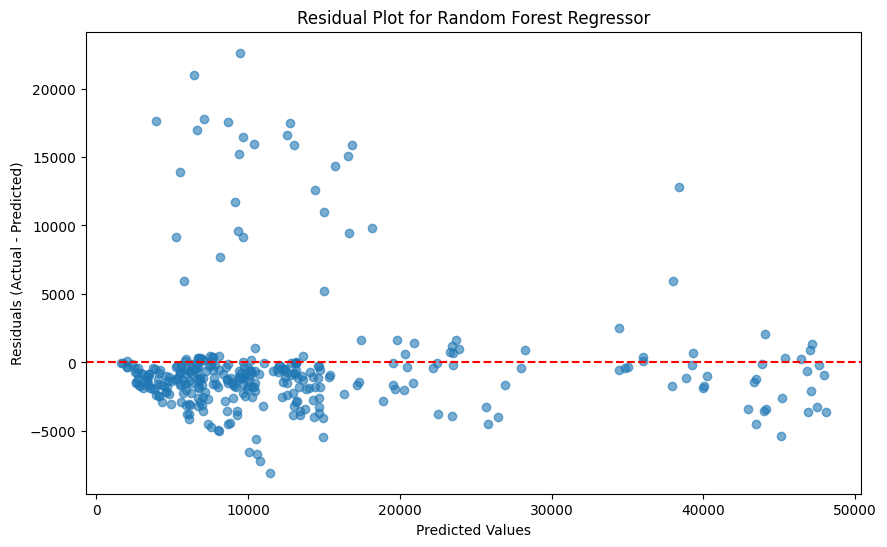

In [199]:
# Residual plot

y_pred_test = best_rf.predict(x_test)

residuals = y_test - y_pred_test

# Plot residuals vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_pred_test, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot for Random Forest Regressor')
plt.show()

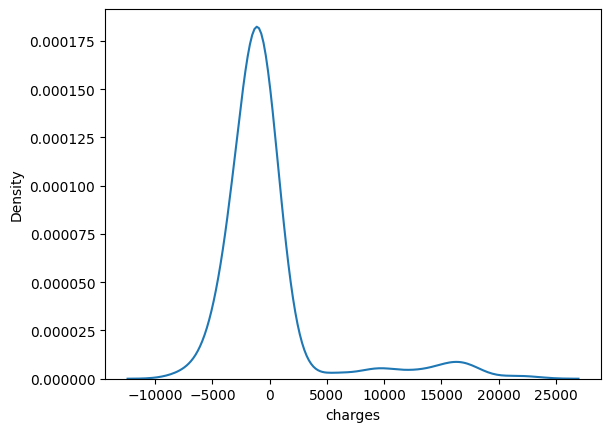

In [200]:
sns.kdeplot(residuals)
plt.show()

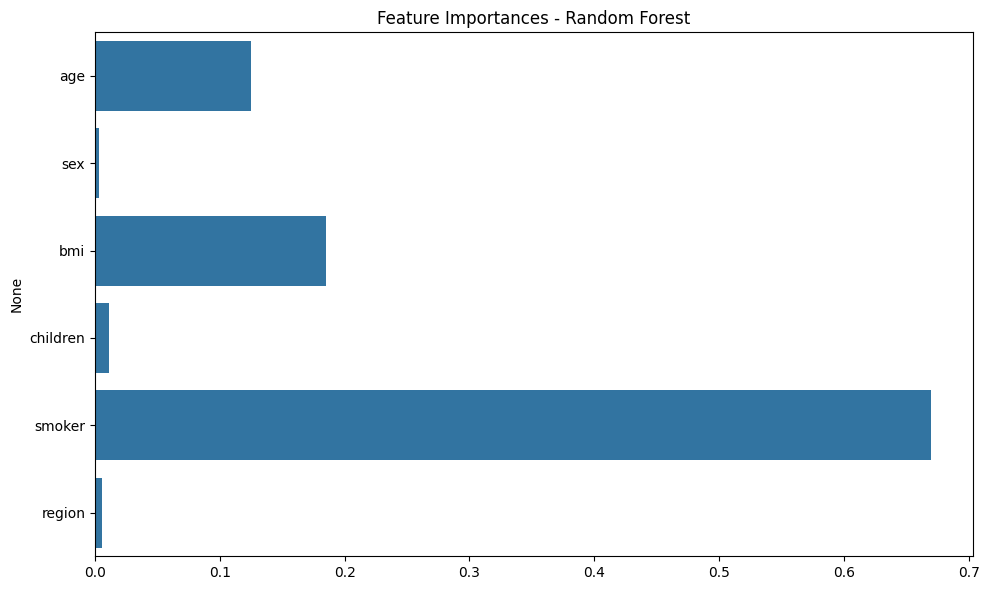

In [201]:
importances = best_rf.feature_importances_
feat_names = x.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feat_names)
plt.title("Feature Importances - Random Forest")
plt.tight_layout()
plt.show()